<a href="https://colab.research.google.com/github/sepaharvey/Fantasy-Football-Python-Refresh/blob/main/Section_5_Data_Munging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

#view the version

print(pd.__version__)

import warnings; warnings.simplefilter('ignore')

2.2.2


In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/LearnPythonWithFantasyFootball/master/2023/06-Data%20Munging/01-FDP%20Projections%20-%20(2023.03.30).csv')

df.head()

,Player,Team,Pos,PassingYds,PassingTD,Int,RushingAtt,RushingYds,RushingTD,Receptions,ReceivingYds,ReceivingTD
0,Josh Allen,BUF,QB,4451,27,13,133,754,13,0,0,0
1,Patrick Mahomes,KAN,QB,5760,34,6,52,297,3,0,0,0
2,Jalen Hurts,PHI,QB,4010,19,10,184,1019,13,0,0,0
3,Joe Burrow,CIN,QB,5525,37,15,24,136,2,0,0,0
4,Lamar Jackson,BAL,QB,2902,31,4,190,1052,6,0,0,0


In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.head(10)

,Player,Team,Pos,PassingYds,PassingTD,Int,RushingAtt,RushingYds,RushingTD,Receptions,ReceivingYds,ReceivingTD
0,Josh Allen,BUF,QB,4451,27,13,133,754,13,0,0,0
1,Patrick Mahomes,KAN,QB,5760,34,6,52,297,3,0,0,0
2,Jalen Hurts,PHI,QB,4010,19,10,184,1019,13,0,0,0
3,Joe Burrow,CIN,QB,5525,37,15,24,136,2,0,0,0
4,Lamar Jackson,BAL,QB,2902,31,4,190,1052,6,0,0,0
5,Justin Fields,CHI,QB,4304,17,24,189,991,4,0,0,0
6,Justin Herbert,LAC,QB,4329,33,12,48,272,2,0,0,0
7,Trevor Lawrence,JAC,QB,5359,17,26,91,470,3,0,0,0
8,Dak Prescott,DAL,QB,4560,27,9,47,255,3,0,0,0
9,Daniel Jones,NYG,QB,4080,31,16,69,381,3,0,0,0


In [7]:
df[:5]

,Player,Team,Pos,PassingYds,PassingTD,Int,RushingAtt,RushingYds,RushingTD,Receptions,ReceivingYds,ReceivingTD
0,Josh Allen,BUF,QB,4451,27,13,133,754,13,0,0,0
1,Patrick Mahomes,KAN,QB,5760,34,6,52,297,3,0,0,0
2,Jalen Hurts,PHI,QB,4010,19,10,184,1019,13,0,0,0
3,Joe Burrow,CIN,QB,5525,37,15,24,136,2,0,0,0
4,Lamar Jackson,BAL,QB,2902,31,4,190,1052,6,0,0,0


In [11]:
df.iloc[10:15,0:10]

,Player,Team,Pos,PassingYds,PassingTD,Int,RushingAtt,RushingYds,RushingTD,Receptions
10,Tua Tagovailoa,MIA,QB,4514,26,16,38,201,5,0
11,Kirk Cousins,MIN,QB,4498,32,6,13,78,0,0
12,Deshaun Watson,CLE,QB,3795,25,4,63,355,1,0
13,Trey Lance,SFO,QB,2639,23,9,127,710,4,0
14,Kyler Murray,ARI,QB,3229,18,11,84,487,4,0


In [12]:
df.columns

Index(['Player', 'Team', 'Pos', 'PassingYds', 'PassingTD', 'Int', 'RushingAtt',
       'RushingYds', 'RushingTD', 'Receptions', 'ReceivingYds', 'ReceivingTD'],
      dtype='object')

In [15]:
' ,'.join(df.columns)

'Player ,Team ,Pos ,PassingYds ,PassingTD ,Int ,RushingAtt ,RushingYds ,RushingTD ,Receptions ,ReceivingYds ,ReceivingTD'

In [16]:
scoring_weights = {
    'receptions' : 0.5,  #half ppr
    'receiving_yds' : 0.1,
    'receiving_td' : 6,
    'rushing_yds' : 0.1,
    'rushing_td' : 6,
    'passing_yds' : 0.04,
    'passing_td' : 4,
    'int' : -2
}

In [17]:
df['FantasyPoints'] = (
    df['Receptions'] * scoring_weights['receptions'] +
    df['ReceivingYds'] * scoring_weights['receiving_yds'] +
    df['ReceivingTD'] * scoring_weights['receiving_td'] +
    df['RushingYds'] * scoring_weights['rushing_yds'] +
    df['RushingTD'] * scoring_weights['rushing_td']+
    df['PassingYds'] * scoring_weights['passing_yds'] +
    df['PassingTD'] * scoring_weights['passing_td'] +
    df['Int'] * scoring_weights['int']
)

In [18]:
df.head()

,Player,Team,Pos,PassingYds,PassingTD,Int,RushingAtt,RushingYds,RushingTD,Receptions,ReceivingYds,ReceivingTD,FantasyPoints
0,Josh Allen,BUF,QB,4451,27,13,133,754,13,0,0,0,413.44
1,Patrick Mahomes,KAN,QB,5760,34,6,52,297,3,0,0,0,402.10
2,Jalen Hurts,PHI,QB,4010,19,10,184,1019,13,0,0,0,396.30
3,Joe Burrow,CIN,QB,5525,37,15,24,136,2,0,0,0,364.60
4,Lamar Jackson,BAL,QB,2902,31,4,190,1052,6,0,0,0,373.28


In [19]:
# mask our DataFrame based off a position
"""
.loc is a way of getting back specified cross sections of your DataFrame.

The syntax is as follows:

new_df = old_df.loc[row_indexer, column_indexer]

Where row_indexer can take the form of a boolean indexer.

For example, df['Pos'] == 'RB'

or, df['RushingAtt'] > 20

or, df['Pos'].isin(['QB', 'WR', 'RB', TE]) # check if a player's position is a skill position

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html # docs on loc

https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html # docs on indexing

"""


rb_df = df.loc[df['Pos']=='RB']

rb_df.head()

,Player,Team,Pos,PassingYds,PassingTD,Int,RushingAtt,RushingYds,RushingTD,Receptions,ReceivingYds,ReceivingTD,FantasyPoints
45,Christian McCaffrey,SFO,RB,0,0,0,299,1314,8,114,1059,3,360.3
46,Jonathan Taylor,IND,RB,0,0,0,329,1787,16,37,340,2,339.2
47,Austin Ekeler,LAC,RB,0,0,0,205,906,12,69,615,8,306.6
48,Saquon Barkley,NYG,RB,0,0,0,318,1225,3,79,506,3,248.6
49,Kenneth Walker III,SEA,RB,0,0,0,293,1212,8,54,434,1,245.6


In [21]:
base_columns = ['Player', 'Team', 'Pos']

rushing_columns = ['FantasyPoints', 'Receptions', 'ReceivingYds', 'ReceivingTD', 'RushingAtt', 'RushingYds', 'RushingTD']

"""

Here, we can mask (what we are doing in the row indexer) and filter (what we are doing in the column indexer)
all in one line. Pass in (the boolean indexer, columns you'd like to keep) as a tuple.

Also recall that lists can be concatenated together.


"""

rb_df = df.loc[df['Pos']=='RB', base_columns + rushing_columns]

rb_df.head()

,Player,Team,Pos,FantasyPoints,Receptions,ReceivingYds,ReceivingTD,RushingAtt,RushingYds,RushingTD
45,Christian McCaffrey,SFO,RB,360.3,114,1059,3,299,1314,8
46,Jonathan Taylor,IND,RB,339.2,37,340,2,329,1787,16
47,Austin Ekeler,LAC,RB,306.6,69,615,8,205,906,12
48,Saquon Barkley,NYG,RB,248.6,79,506,3,318,1225,3
49,Kenneth Walker III,SEA,RB,245.6,54,434,1,293,1212,8


In [22]:
"""
The sort_values method of a DataFrame allows us sort our table by a given column.

The 'by' parameter of the function here is a required argument, and it should be the name of
one of the columns in your table.

The 'ascending' argument is optional. If you want to sort your table from largest to smallest, set

ascending = False to sort in descending order. The object we get back from the sort_values function
is also a pandas DataFrame, and so we can chain methods as we do below with sort_values and head.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

"""


# sort RBs by RushingYds in descending order and get us back the top 15 rows.
rb_df.sort_values(by='RushingYds', ascending = False).head(15)

,Player,Team,Pos,FantasyPoints,Receptions,ReceivingYds,ReceivingTD,RushingAtt,RushingYds,RushingTD
46,Jonathan Taylor,IND,RB,339.2,37,340,2,329,1787,16
54,Nick Chubb,CLE,RB,224.7,21,202,1,259,1340,9
45,Christian McCaffrey,SFO,RB,360.3,114,1059,3,299,1314,8
51,Derrick Henry,TEN,RB,241.7,24,204,0,313,1313,13
55,Rhamondre Stevenson,NWE,RB,225.6,29,240,0,256,1271,10
48,Saquon Barkley,NYG,RB,248.6,79,506,3,318,1225,3
61,Dalvin Cook,MIN,RB,199.0,35,234,0,259,1221,6
49,Kenneth Walker III,SEA,RB,245.6,54,434,1,293,1212,8
52,Travis Etienne Jr.,JAC,RB,210.0,47,380,0,270,1125,6
53,Breece Hall,NYJ,RB,225.3,49,405,1,264,1123,7


In [24]:
"""
We can use the describe method to get summary/descriptive statistics about our DataFrame extremely quickly

We can also use transpose to switch the columns and index.

# describe docs

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

# transpose documentation

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transpose.html

"""

# get us back descriptive stats about our rb_df and transpose the DataFrame.
rb_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
FantasyPoints,80.0,125.6650,73.613386,31.4,63.65,111.35,171.75,360.3
Receptions,80.0,27.0625,18.768641,4.0,13.00,24.00,33.50,114.0
ReceivingYds,80.0,215.3000,153.126026,33.0,106.75,189.50,265.75,1059.0
ReceivingTD,80.0,0.8000,1.286739,0.0,0.00,0.00,1.00,8.0
RushingAtt,80.0,141.0750,79.015265,27.0,73.75,126.00,190.50,329.0
RushingYds,80.0,618.0375,360.409452,113.0,309.00,570.00,830.75,1787.0
RushingTD,80.0,4.0000,3.260815,0.0,2.00,3.00,5.00,16.0


In [25]:
"""
This is how you get back a Series object, or column, from your DataFrame.
Here, we just want the first 10 rows of our Series object.

Documentation on pandas Series objects. Below, we cover some aggregate functions we can run
on these Series objects.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html

"""

rb_df['RushingAtt'][:10]

,RushingAtt
45,299
46,329
47,205
48,318
49,293
50,254
51,313
52,270
53,264
54,259


In [ ]:
rb_df['RushingAtt'].max()

329

In [26]:
rb_df['RushingAtt'].std()

79.01526450829903

In [27]:
rb_df['RushingAtt'].min()

27

In [28]:
rb_df['RushingAtt'].quantile(0.75) #Series 75th percentil for RushingAtt

190.5

In [29]:
rb_df['RushingAtt'].quantile(0.25) #Series 25th percentil for RushingAtt

73.75

In [34]:
"""
The rank method can be used to rank players based on a given column.

Set ascending = False to rank the column in descending order.

We will be using this rank players on value over replacement and also on ADP.

"""


rb_df['RushingTDRank'] = rb_df['RushingTD'].rank(ascending=False)

rb_df.sort_values(by='RushingTDRank').head(5)

,Player,Team,Pos,FantasyPoints,Receptions,ReceivingYds,ReceivingTD,RushingAtt,RushingYds,RushingTD,RushingTDRank
46,Jonathan Taylor,IND,RB,339.2,37,340,2,329,1787,16,1.0
51,Derrick Henry,TEN,RB,241.7,24,204,0,313,1313,13,2.0
47,Austin Ekeler,LAC,RB,306.6,69,615,8,205,906,12,3.0
66,J.K. Dobbins,BAL,RB,184.1,20,138,0,151,943,11,4.0
55,Rhamondre Stevenson,NWE,RB,225.6,29,240,0,256,1271,10,6.0


In [35]:
"""
The value_counts is a Series method can be used to find the number of occurances in a column.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html

Notice that the value_counts method is for Series', not DataFrames.
"""

rb_df['Team'].value_counts()

,count
Team,
FA,11
SFO,4
KAN,4
JAC,3
BAL,3
DEN,3
BUF,3
NYJ,3
LAC,3


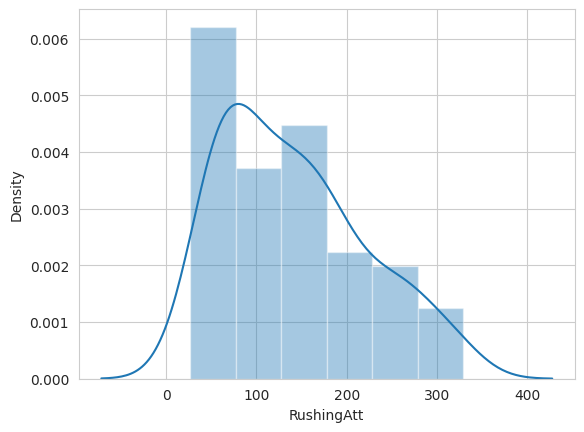

In [36]:
"""
We can also visualize this data in the same fashion.
"""
import seaborn as sns

sns.set_style('whitegrid')
sns.distplot(rb_df['RushingAtt']);

In [37]:
"""
values is how we get back a Numpy array representation of our data. Underneath the hood of Pandas,
DataFrames are multi-dimensional arrays. We will cover Numpy arrays in more detail in the machine learning section.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.values.html
"""

rb_df.values[:5]

array([['Christian McCaffrey', 'SFO', 'RB', 360.3, 114, 1059, 3, 299,
        1314, 8, 11.0],
       ['Jonathan Taylor', 'IND', 'RB', 339.20000000000005, 37, 340, 2,
        329, 1787, 16, 1.0],
       ['Austin Ekeler', 'LAC', 'RB', 306.6, 69, 615, 8, 205, 906, 12,
        3.0],
       ['Saquon Barkley', 'NYG', 'RB', 248.6, 79, 506, 3, 318, 1225, 3,
        44.0],
       ['Kenneth Walker III', 'SEA', 'RB', 245.60000000000002, 54, 434,
        1, 293, 1212, 8, 11.0]], dtype=object)

# Grabbing ADP Data


With that out of the way, let's bring in ADP data for 2023.


[Link to Underdog Best Ball Draft ADP data](https://raw.githubusercontent.com/fantasydatapros/LearnPythonWithFantasyFootball/master/2023/06-Data%20Munging/02-ADP%20Data%20-%20(2023.03.30).csv)

In [38]:
adp_df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/LearnPythonWithFantasyFootball/master/2023/06-Data%20Munging/02-ADP%20Data%20-%20(2023.03.30).csv')

adp_df.head(5)

,Player,Pos,Team,Current ADP
0,Justin Jefferson,WR,MIN,1.1
1,Ja'Marr Chase,WR,CIN,2.3
2,Christian McCaffrey,RB,SF,3.0
3,Cooper Kupp,WR,LAR,4.8
4,Tyreek Hill,WR,MIA,5.1


In [41]:
# Let's add a column for ADP rank, as the Current ADP column only tells us their average ADP doesn't tell us much
# we're more interested in the order of the AVG column than the average itself.

adp_df['ADP Rank'] = adp_df['Current ADP'].rank(ascending = True)

adp_df.head()

,Player,Pos,Team,Current ADP,ADP Rank
0,Justin Jefferson,WR,MIN,1.1,1.0
1,Ja'Marr Chase,WR,CIN,2.3,2.0
2,Christian McCaffrey,RB,SF,3.0,3.0
3,Cooper Kupp,WR,LAR,4.8,4.0
4,Tyreek Hill,WR,MIA,5.1,5.0


In [46]:
adp_df_cutoff = adp_df[:75]

# shape gets us back a tuple with the number of rows, and number of columns
# you can also use the Python built-in function len() to find the number of rows.

adp_df_cutoff.shape

(75, 5)

In [48]:
# initialize an empty dictionary.
# this is where we are going to save our replacement players


replacement_players = {
    'RB' : '',
    'QB' : '',
    'WR' : '',
    'TE' : ''
}


"""

We can iterate over our DataFrame using the iterrows method.

It's similar to the items method for dictionary looping.

Instead of key, values in dict.items(), we get back the index, row in df.items()

Here, we're using _ as the placeholder value for the index. Whenever you do not use a variable when looping,
you should use _ as a placeholder to tell yourself later and other people reading your code that this is a
dummy variable. This is good style.

Using iterrows, we can iterate over our DataFrame, and get access to each row's column values.

We can access these column value much like we would values in a dictionary, using the [] notation.

Here, we are constantly re-setting the keys in the dict we instantiated above with the most recent player from
our loop, if their position is in replacement_players keys (in other words, if they are a WR, RB, TE, or qb)

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html

"""


for _, row in adp_df_cutoff.iterrows():

    position = row['Pos'] # extract out the position and player value from each row as we loop through it
    player = row['Player']

    if position in replacement_players: # if the position is in the dict's keys
        replacement_players[position] = player # set that player as the replacement player



replacement_players

{'RB': 'Isiah Pacheco',
 'QB': 'Trevor Lawrence',
 'WR': 'Diontae Johnson',
 'TE': 'Dallas Goedert'}

In [49]:
"""
This is how we filter out columns in pandas without using loc.

The syntax is as follows

df = df[columns_wed_like_to_keep_in_list_form]

"""
df = df[['Player', 'Pos', 'Team', 'FantasyPoints']] # filtering out the columns we need.

df.head()

,Player,Pos,Team,FantasyPoints
0,Josh Allen,QB,BUF,413.44
1,Patrick Mahomes,QB,KAN,402.10
2,Jalen Hurts,QB,PHI,396.30
3,Joe Burrow,QB,CIN,364.60
4,Lamar Jackson,QB,BAL,373.28


In [59]:
replacement_values = {} #initialize and empty dicitionary

for position, player_name in replacement_players.items():

  player = df.loc[df['Player'] == player_name.strip()]
  # because this is a series object we get back, we need to use the tolist method
  # to get back the series as a list. The list object is of length 1, and the 1 item has the value we need.
  # we tack on a [0] to get the value we need.

  replacement_values[position] = player['FantasyPoints'].tolist()[0]

In [61]:
print(replacement_values)

{'RB': 132.2, 'QB': 295.36, 'WR': 171.5, 'TE': 137.5}


In [62]:
"""
the isin method lets us check if a value is in a list
and can be passed as a boolean indexer / row filter / mask

here, we want to filter out all those rows who's position column is not in

['QB', 'RB', 'WR', 'TE']

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html

"""

# this will be explained in the next chapter
pd.set_option('chained_assignment', None)

df = df.loc[df['Pos'].isin(['QB', 'RB', 'WR', 'TE'])]

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
df['VOR'] = df.apply(
    lambda row: row['FantasyPoints'] - replacement_values.get(row['Pos']), axis=1
)

df.head()

,Player,Pos,Team,FantasyPoints,VOR
0,Josh Allen,QB,BUF,413.44,118.08
1,Patrick Mahomes,QB,KAN,402.10,106.74
2,Jalen Hurts,QB,PHI,396.30,100.94
3,Joe Burrow,QB,CIN,364.60,69.24
4,Lamar Jackson,QB,BAL,373.28,77.92


In [63]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html
pd.set_option('display.max_rows', None) # turn off truncation of rows setting inherent to pandas

df['VOR Rank'] = df['VOR'].rank(ascending=False)

df.sort_values(by='VOR', ascending=False).head(100)

,Player,Pos,Team,FantasyPoints,VOR,VOR Rank
45,Christian McCaffrey,RB,SFO,360.30,228.10,1.0
46,Jonathan Taylor,RB,IND,339.20,207.00,2.0
47,Austin Ekeler,RB,LAC,306.60,174.40,3.0
125,Justin Jefferson,WR,MIN,342.90,171.40,4.0
126,Ja'Marr Chase,WR,CIN,311.20,139.70,5.0
127,Cooper Kupp,WR,LAR,299.20,127.70,6.0
215,Travis Kelce,TE,KAN,257.80,120.30,7.0
0,Josh Allen,QB,BUF,413.44,118.08,8.0
48,Saquon Barkley,RB,NYG,248.60,116.40,9.0
49,Kenneth Walker III,RB,SEA,245.60,113.40,10.0


In [64]:
"""
the pandas groupby method allows us to groupby a specific column, called "splitting",
then apply a summary function over to each group. We can split this up by column as well, by tacking
on ['ColumName'] after grouping and before applying the summary function.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

"""

df.groupby('Pos')['VOR'].describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
QB,45.0,-95.917333,111.345069,-251.96,-186.400,-103.58,0.00,118.08
RB,80.0,-6.535000,73.613386,-100.80,-68.550,-20.85,39.55,228.10
TE,33.0,-32.233333,46.110280,-137.50,-64.900,-33.50,-9.50,120.30
WR,90.0,-33.327778,61.051051,-112.60,-83.425,-46.25,9.30,171.40


In [72]:
# standard score example. Notice axis is not set to 1 as we are applying a function across a column here.
# df['VOR'] = df['VOR'].apply(lambda x: (x - df['VOR'].mean()) / df['VOR'].std())



df['VOR'] = df['VOR'].apply(lambda x: (x - df['VOR'].min()) / (df['VOR'].max() - df['VOR'].min()))
df = df.sort_values(by='VOR Rank')
df.head(100)

,Player,Pos,Team,FantasyPoints,VOR,VOR Rank
45,Christian McCaffrey,RB,SFO,360.30,1.000000,1.0
46,Jonathan Taylor,RB,IND,339.20,0.956047,2.0
47,Austin Ekeler,RB,LAC,306.60,0.888139,3.0
125,Justin Jefferson,WR,MIN,342.90,0.881890,4.0
126,Ja'Marr Chase,WR,CIN,311.20,0.815856,5.0
127,Cooper Kupp,WR,LAR,299.20,0.790859,6.0
215,Travis Kelce,TE,KAN,257.80,0.775445,7.0
0,Josh Allen,QB,BUF,413.44,0.770820,8.0
48,Saquon Barkley,RB,NYG,248.60,0.767321,9.0
49,Kenneth Walker III,RB,SEA,245.60,0.761072,10.0


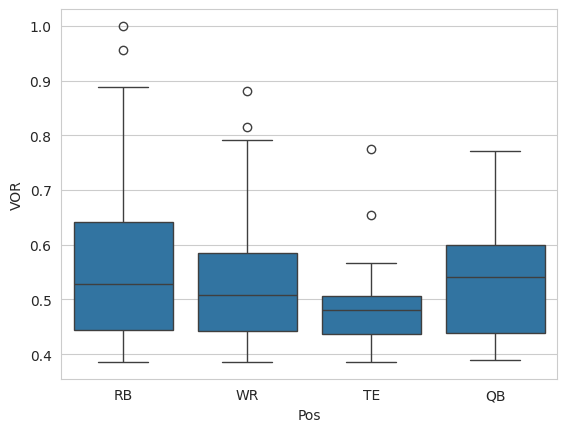

In [73]:
# calculating how many players are in our draft pool.
num_teams = 10
num_spots = 16 # 1 QB, 2RB, 2WR, 1TE, 1FLEX, 1K, 1DST, 7 BENCH
draft_pool = num_teams * num_spots

df_copy = df[:draft_pool]

sns.boxplot(x=df_copy['Pos'], y=df_copy['VOR']);

In [74]:
# let's rename our VOR column to just Value.
# remember, to make a change to our DataFrame, you set it equal to itself + some modifcation
# we can use the rename method here to help us do that
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html

df = df.rename({
    'VOR': 'Value',
    'VOR Rank': 'Value Rank'
}, axis=1) # axis = 1 means make the change along the column axis.

In [76]:
adp_df = adp_df.rename({
    'PLAYER': 'Player',
    'POS': 'Pos',
    'AVG' : 'Average ADP',
    'ADP RANK' : 'ADP Rank'
}, axis = 1)

adp_df = adp_df.drop('Team', axis = 1)

In [77]:
df['Player'] = df['Player'].replace({
    'Kenneth Walker III': 'Kenneth Walker',
    'Travis Etienne Jr.': 'Travis Etienne',
    'Brian Robinson Jr.': 'Brian Robinson',
    'Pierre Strong Jr.': 'Pierre Strong',
    'Michael Pittman Jr.': 'Michael Pittman',
    'A.J. Dillon': 'AJ Dillon',
    'D.J. Moore': 'DJ Moore'
})

In [78]:
"""
the merge function allows us to combine DataFrames together column wise on common columns.

Here, we are left joining. Which means any entries that exist in the right table (adp_df) but
do not exist in the left table (df) get dropped from the final table.

We want to join the two DataFrames together where the Player and Pos columns match up.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html

Also, you may want to take a look at join, which is similar

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html
"""

final_df = df.merge(adp_df, how='left', on=['Player', 'Pos'])

final_df.head(100)

,Player,Pos,Team,FantasyPoints,Value,Value Rank,Current ADP,ADP Rank
0,Christian McCaffrey,RB,SFO,360.30,1.000000,1.0,3.0,3.0
1,Jonathan Taylor,RB,IND,339.20,0.956047,2.0,11.2,11.0
2,Austin Ekeler,RB,LAC,306.60,0.888139,3.0,12.7,12.0
3,Justin Jefferson,WR,MIN,342.90,0.881890,4.0,1.1,1.0
4,Ja'Marr Chase,WR,CIN,311.20,0.815856,5.0,2.3,2.0
5,Cooper Kupp,WR,LAR,299.20,0.790859,6.0,4.8,4.0
6,Travis Kelce,TE,KAN,257.80,0.775445,7.0,6.2,6.0
7,Josh Allen,QB,BUF,413.44,0.770820,8.0,19.1,18.5
8,Saquon Barkley,RB,NYG,248.60,0.767321,9.0,14.2,14.0
9,Kenneth Walker,RB,SEA,245.60,0.761072,10.0,22.2,22.0


In [79]:
# let's calculate the difference between our value rank and adp rank
final_df['Diff in ADP and Value'] = final_df['ADP Rank'] - final_df['Value Rank']

#removing outliers in ADP
final_df = final_df.loc[final_df['ADP Rank'] <= 212]

final_df.head()

,Player,Pos,Team,FantasyPoints,Value,Value Rank,Current ADP,ADP Rank,Diff in ADP and Value
0,Christian McCaffrey,RB,SFO,360.3,1.000000,1.0,3.0,3.0,2.0
1,Jonathan Taylor,RB,IND,339.2,0.956047,2.0,11.2,11.0,9.0
2,Austin Ekeler,RB,LAC,306.6,0.888139,3.0,12.7,12.0,9.0
3,Justin Jefferson,WR,MIN,342.9,0.881890,4.0,1.1,1.0,-3.0
4,Ja'Marr Chase,WR,CIN,311.2,0.815856,5.0,2.3,2.0,-3.0


In [80]:
draft_pool = final_df.sort_values(by='ADP Rank')[:196]

rb_draft_pool = draft_pool.loc[draft_pool['Pos'] == 'RB']
qb_draft_pool = draft_pool.loc[draft_pool['Pos'] == 'QB']
wr_draft_pool = draft_pool.loc[draft_pool['Pos'] == 'WR']
te_draft_pool = draft_pool.loc[draft_pool['Pos'] == 'TE']

In [81]:
# top 10 RB sleepers for this year's draft

rb_draft_pool.sort_values(by= 'Diff in ADP and Value', ascending=False)[:10]

,Player,Pos,Team,FantasyPoints,Value,Value Rank,Current ADP,ADP Rank,Diff in ADP and Value
69,Leonard Fournette,RB,FA,134.3,0.529226,70.0,182.0,182.0,112.0
104,Jerick McKinnon,RB,KAN,110.6,0.479857,105.0,209.7,206.0,101.0
130,Chuba Hubbard,RB,CAR,86.1,0.428821,131.0,210.7,207.0,76.0
122,Michael Carter,RB,NYJ,90.4,0.437779,123.0,201.7,199.0,76.0
99,Devin Singletary,RB,HOU,111.5,0.481731,100.0,173.3,173.0,73.0
70,Antonio Gibson,RB,WAS,134.1,0.528809,71.0,141.0,141.0,70.0
76,Ezekiel Elliott,RB,FA,127.7,0.515477,77.0,147.3,146.0,69.0
80,Kareem Hunt,RB,CLE,124.5,0.508811,81.0,150.4,148.0,67.0
38,Alvin Kamara,RB,NOR,167.9,0.599217,39.0,104.6,105.0,66.0
35,James Conner,RB,ARI,171.1,0.605883,36.0,101.5,100.0,64.0


In [82]:
# top 10 RB overvalued for this year's draft
rb_draft_pool.sort_values(by='Diff in ADP and Value', ascending=True)[:10]

,Player,Pos,Team,FantasyPoints,Value,Value Rank,Current ADP,ADP Rank,Diff in ADP and Value
184,Zach Charbonnet,RB,FA,50.0,0.353622,185.0,97.0,95.0,-90.0
96,Bijan Robinson,RB,FA,112.4,0.483606,97.0,13.2,13.0,-84.0
141,Jahmyr Gibbs,RB,FA,76.6,0.409032,142.0,60.6,60.0,-82.0
179,Devon Achane,RB,FA,52.0,0.357789,180.0,151.2,150.5,-29.5
145,Samaje Perine,RB,DEN,75.0,0.405699,146.0,127.7,127.0,-19.0
108,Rashaad Penny,RB,PHI,103.7,0.465483,109.0,102.1,102.0,-7.0
30,Tony Pollard,RB,DAL,185.6,0.636087,31.0,29.1,29.0,-2.0
136,D'Onta Foreman,RB,CHI,82.8,0.421947,137.0,136.6,136.0,-1.0
73,Isiah Pacheco,RB,KAN,132.2,0.524851,73.5,76.3,75.0,1.5
0,Christian McCaffrey,RB,SFO,360.3,1.000000,1.0,3.0,3.0,2.0


In [83]:
# top 10 WR sleepers for this year's draft
final_df.sort_values(by='Diff in ADP and Value', ascending=False)[:10]

,Player,Pos,Team,FantasyPoints,Value,Value Rank,Current ADP,ADP Rank,Diff in ADP and Value
69,Leonard Fournette,RB,FA,134.3,0.529226,70.0,182.0,182.0,112.0
104,Jerick McKinnon,RB,KAN,110.6,0.479857,105.0,209.7,206.0,101.0
122,Michael Carter,RB,NYJ,90.4,0.437779,123.0,201.7,199.0,76.0
125,Noah Fant,TE,SEA,94.5,0.435279,126.0,204.5,202.0,76.0
130,Chuba Hubbard,RB,CAR,86.1,0.428821,131.0,210.7,207.0,76.0
110,Trey McBride,TE,ARI,107.9,0.463192,111.0,186.4,184.0,73.0
99,Devin Singletary,RB,HOU,111.5,0.481731,100.0,173.3,173.0,73.0
70,Antonio Gibson,RB,WAS,134.1,0.528809,71.0,141.0,141.0,70.0
76,Ezekiel Elliott,RB,FA,127.7,0.515477,77.0,147.3,146.0,69.0
80,Kareem Hunt,RB,CLE,124.5,0.508811,81.0,150.4,148.0,67.0


In [84]:
# top 10 WR overvalued for this year's draft
wr_draft_pool.sort_values(by='Diff in ADP and Value', ascending=True)[:10]

,Player,Pos,Team,FantasyPoints,Value,Value Rank,Current ADP,ADP Rank,Diff in ADP and Value
204,Jaxon Smith-Njigba,WR,FA,80.4,0.335083,205.0,51.6,52.0,-153.0
214,Quentin Johnston,WR,FA,72.8,0.319252,214.5,84.2,84.0,-130.5
205,Jordan Addison,WR,FA,79.5,0.333208,206.0,89.1,89.0,-117.0
134,Calvin Ridley,WR,JAC,123.9,0.425697,135.0,36.8,37.0,-98.0
182,K.J. Osborn,WR,MIN,90.3,0.355706,183.0,111.0,111.0,-72.0
124,Jameson Williams,WR,DET,128.6,0.435487,125.0,54.3,53.0,-72.0
161,Michael Thomas,WR,NOR,103.4,0.382994,162.0,97.2,96.0,-66.0
126,Kadarius Toney,WR,KAN,128.3,0.434862,127.0,72.0,72.0,-55.0
212,Marquez Valdes-Scantling,WR,KAN,72.9,0.319460,213.0,159.3,162.0,-51.0
173,Skyy Moore,WR,KAN,96.6,0.368829,174.0,122.5,123.0,-51.0


In [85]:
# top 10 TE sleepers for this year's draft
te_draft_pool.sort_values(by='Diff in ADP and Value', ascending=False)[:10]

,Player,Pos,Team,FantasyPoints,Value,Value Rank,Current ADP,ADP Rank,Diff in ADP and Value
125,Noah Fant,TE,SEA,94.5,0.435279,126.0,204.5,202.0,76.0
110,Trey McBride,TE,ARI,107.9,0.463192,111.0,186.4,184.0,73.0
116,Gerald Everett,TE,LAC,98.6,0.443820,117.0,181.4,181.0,64.0
106,Tyler Higbee,TE,LAR,111.5,0.470691,107.0,172.9,171.0,64.0
146,Hayden Hurst,TE,CIN,80.2,0.405491,147.0,197.9,197.5,50.5
92,Greg Dulcich,TE,DEN,121.0,0.490480,93.0,141.8,143.0,50.0
84,Dalton Schultz,TE,HOU,128.0,0.505062,85.0,127.9,128.0,43.0
169,Jelani Woods,TE,IND,64.2,0.372162,170.0,213.0,212.0,42.0
157,Isaiah Likely,TE,BAL,70.9,0.386118,158.0,197.3,195.0,37.0
144,Mike Gesicki,TE,MIA,80.4,0.405908,145.0,178.8,179.0,34.0


In [86]:
# top 10 TE overvalued for this year's draft
te_draft_pool.sort_values(by='Diff in ADP and Value', ascending=True)[:10]

,Player,Pos,Team,FantasyPoints,Value,Value Rank,Current ADP,ADP Rank,Diff in ADP and Value
229,Taysom Hill,TE,NOR,0.0,0.238429,230.0,152.9,153.0,-77.0
77,George Kittle,TE,SFO,132.2,0.513811,78.0,54.6,54.0,-24.0
93,Darren Waller,TE,NYG,120.9,0.490272,94.0,81.3,82.0,-12.0
53,T.J. Hockenson,TE,MIN,157.2,0.565888,54.0,43.8,43.0,-11.0
74,Dallas Goedert,TE,PHI,137.5,0.524851,73.5,69.9,69.0,-4.5
64,Kyle Pitts,TE,ATL,146.8,0.544224,65.0,63.6,63.0,-2.0
6,Travis Kelce,TE,KAN,257.8,0.775445,7.0,6.2,6.0,-1.0
155,Juwan Johnson,TE,NOR,72.6,0.389660,156.0,158.8,160.5,4.5
81,Evan Engram,TE,JAC,128.5,0.506103,82.0,86.5,87.0,5.0
27,Mark Andrews,TE,BAL,199.7,0.654418,28.0,41.3,41.0,13.0


In [87]:
# top 10 QB sleepers for this year's draft
qb_draft_pool.sort_values(by='Diff in ADP and Value', ascending=False)[:10]


,Player,Pos,Team,FantasyPoints,Value,Value Rank,Current ADP,ADP Rank,Diff in ADP and Value
57,Daniel Jones,QB,NYG,311.30,0.558055,58.0,98.0,99.0,41.0
66,Kirk Cousins,QB,MIN,303.72,0.542266,67.0,104.9,106.0,39.0
50,Dak Prescott,QB,DAL,315.90,0.567637,51.0,85.9,85.0,34.0
19,Lamar Jackson,QB,BAL,373.28,0.687164,20.0,50.2,50.5,30.5
67,Tua Tagovailoa,QB,MIA,302.66,0.540057,68.0,94.5,93.0,25.0
21,Joe Burrow,QB,CIN,364.60,0.669083,22.0,38.8,38.0,16.0
100,Trey Lance,QB,SFO,274.56,0.481523,101.0,116.6,115.0,14.0
127,Kyler Murray,QB,ARI,251.86,0.434237,128.0,139.6,140.0,12.0
7,Josh Allen,QB,BUF,413.44,0.770820,8.0,19.1,18.5,10.5
46,Justin Herbert,QB,LAC,320.36,0.576928,47.0,55.3,55.0,8.0


In [88]:
# top 10 QB overvalued for this year's draft
qb_draft_pool.sort_values(by='Diff in ADP and Value', ascending=True)[:10]

,Player,Pos,Team,FantasyPoints,Value,Value Rank,Current ADP,ADP Rank,Diff in ADP and Value
242,Anthony Richardson,QB,FA,58.70,0.031871,243.0,151.0,149.0,-94.0
230,Bryce Young,QB,FA,147.32,0.216473,231.0,150.2,147.0,-84.0
234,Jordan Love,QB,GNB,111.74,0.142357,235.0,153.5,155.0,-80.0
228,Jimmy Garoppolo,QB,LVR,163.32,0.249802,229.0,173.0,172.0,-57.0
221,Kenny Pickett,QB,PIT,191.78,0.309086,222.0,169.4,169.0,-53.0
156,Aaron Rodgers,QB,GNB,230.26,0.389243,157.0,114.1,113.0,-44.0
202,Matthew Stafford,QB,LAR,205.06,0.336750,203.0,163.5,163.0,-40.0
150,Jared Goff,QB,DET,234.94,0.398992,151.0,118.9,118.0,-33.0
222,Mac Jones,QB,NWE,191.68,0.308878,223.0,194.6,192.0,-31.0
152,Russell Wilson,QB,DEN,233.50,0.395992,153.0,125.9,125.0,-28.0
